# 6) Time Series

In [1]:
import pandas as pd

# create a time stamp
pd.Timestamp(year=2025,
             month=10,
             day=16,
             hour=9,
             minute=56,
             second=40)

Timestamp('2025-10-16 09:56:40')

In [5]:
pd.Series([pd.Timestamp(2020, 10, 16),
           pd.Timestamp(2020, 10, 17),
           pd.Timestamp(2020, 10, 18)])

0   2020-10-16
1   2020-10-17
2   2020-10-18
dtype: datetime64[ns]

In [6]:
# Read in data 
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<Axes: >

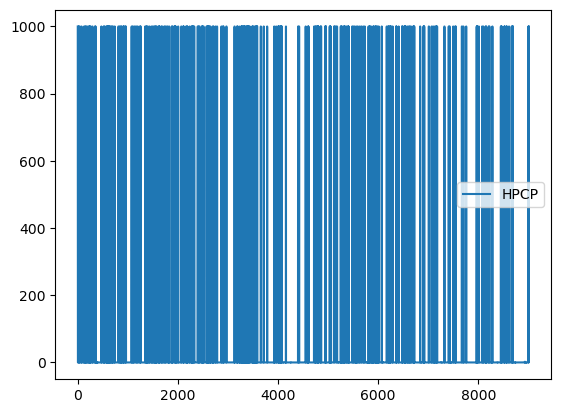

In [7]:
precip.plot()

## Read in the missing data values

Metadata indicates missing values are 999.99
We can directly read in this value as an NA value using `pd.read_csv`

In [8]:
# Read in CSV indicating NA values based on metadata
precip = pd.read_csv(URL, na_values = [999.99] )
precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<Axes: >

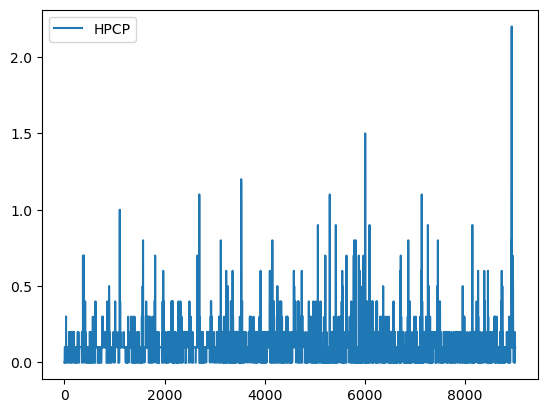

In [10]:
precip.plot()

## Convert strings into dates
Notice `DATE` column is of type 'datetime':

In [11]:
# Check whether DATE column is of type datetime
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [12]:
# Convert DATE column to timestamps
pd.to_datetime(precip['DATE'])
# This doesn't update your dataframe

0      2000-01-01 00:00:00
1      2000-01-01 01:00:00
2      2000-01-02 20:00:00
3      2000-01-03 01:00:00
4      2000-01-03 05:00:00
               ...        
9001   2013-12-22 01:00:00
9002   2013-12-23 00:00:00
9003   2013-12-23 02:00:00
9004   2013-12-29 01:00:00
9005   2013-12-31 00:00:00
Name: DATE, Length: 9006, dtype: datetime64[ns]

In [14]:
# This does update dataframe
precip['DATE'] = pd.to_datetime(precip['DATE'])

# Check types
precip.dtypes

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object

In [15]:
# We want to set the `DATE` 
precip = precip.set_index('DATE')

precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


## Read in dataset in specific format

In [16]:
precip = pd.read_csv(URL,
                     na_values=[999.99],
                     index_col=['DATE'],
                     parse_dates=['DATE'])
precip.head

<bound method NDFrame.head of                          STATION           STATION_NAME  HPCP  \
DATE                                                            
2000-01-01 00:00:00  COOP:055881  NEDERLAND 5 NNW CO US   NaN   
2000-01-01 01:00:00  COOP:055881  NEDERLAND 5 NNW CO US   0.0   
2000-01-02 20:00:00  COOP:055881  NEDERLAND 5 NNW CO US   0.0   
2000-01-03 01:00:00  COOP:055881  NEDERLAND 5 NNW CO US   0.0   
2000-01-03 05:00:00  COOP:055881  NEDERLAND 5 NNW CO US   0.0   
...                          ...                    ...   ...   
2013-12-22 01:00:00  COOP:050843        BOULDER 2 CO US   NaN   
2013-12-23 00:00:00  COOP:050843        BOULDER 2 CO US   NaN   
2013-12-23 02:00:00  COOP:050843        BOULDER 2 CO US   0.1   
2013-12-29 01:00:00  COOP:050843        BOULDER 2 CO US   NaN   
2013-12-31 00:00:00  COOP:050843        BOULDER 2 CO US   NaN   

                    Measurement Flag Quality Flag  
DATE                                               
2000-01-01 00:00:00 

## Subsetting by date

We can use `.loc[year-month]` to select data from a specific year and month

In [17]:
# Select precipitation data from September 2013
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<Axes: xlabel='DATE'>

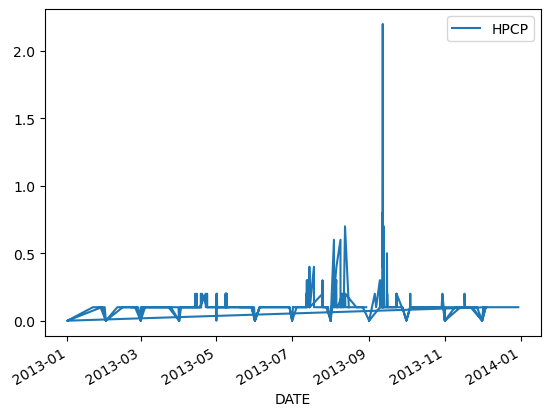

In [19]:
precip.loc['2013'].plot()

## Resample

Resampling a time series means converting a time series from one frequency to another. For example, monthly to yearly (downsampling) or weekly to daily (upsampling).

We can resample with the `resample()` method. The simplest use is to call

```
df.resample(new_frequency).aggregator_function()
```

where: 
 - `new_frequency`: sstring represing the new frequency to resample the data: 'D' for day, 'W' for week, 'Y' for year, 'M' for month
 - `aggregator_function()`: is the function we will use to aggreate the data in to the new frequency. For example. `max()`, `min()`, `sum()`, `average()`.
 
 ### Example
 
 Our 2013 precipitation data ha hourly frequqncy, we want to resample it to daily frequency (downsampling)

In [21]:
# Resample 2013 hourly data to daily frequency
daily_precip_2013 = precip.loc['2013'].resample('D').sum()

<Axes: title={'center': 'Amount of Captain Crunch Sold in Boulder, CO'}, xlabel='DATE'>

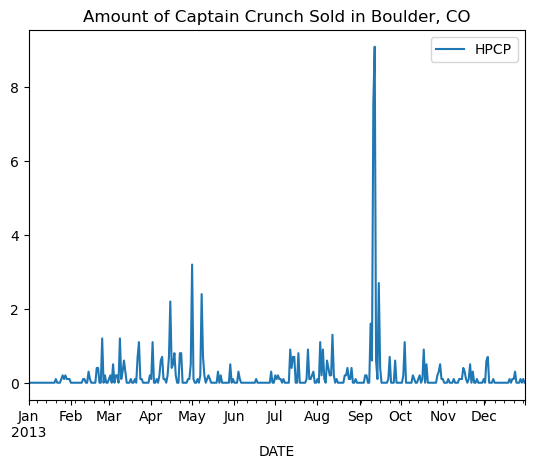

In [25]:
daily_precip_2013.plot(title = 'Amount of Captain Crunch Sold in Boulder, CO')